# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [13]:
# your code here
from random import randint

roll_dice = []

for i in range(10):
  #print("You rolled",randint(1,6))
  roll_dice.append(randint(1,6))

df_dice = pd.DataFrame(roll_dice)
df_dice = df_dice.rename(columns={"0": "Results"})
df_dice

,0
0,6
1,3
2,4
3,3
4,5
5,1
6,5
7,1
8,3
9,3


#### 2.- Plot the results sorted by value.

(array([2., 0., 0., 0., 4., 0., 1., 0., 2., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

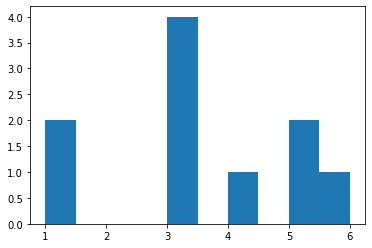

In [21]:
# your code here
import matplotlib.pyplot as plt
df_dice.columns = ['value']
df_dice = df_dice.sort_values(by='value', ascending=False)
plt.hist(df_dice['value'])

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

   Number  Frequency
1       1          2
0       3          4
3       4          1
2       5          2
4       6          1


<BarContainer object of 5 artists>

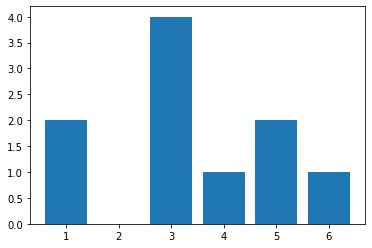

In [40]:
# your code here

freq_dist = df_dice.value_counts().reset_index() 
freq_dist.columns = ['Number', 'Frequency']
freq_dist = freq_dist.sort_values('Number')
print (freq_dist)
plt.bar(freq_dist['Number'],freq_dist['Frequency'])

In [ ]:
"""
Graphs are exactly the same
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [48]:
# your code here
def mean(df):
  return np.sum(df)/len(df)
print(mean(df_dice))

value    3.4
dtype: float64


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [63]:
# your code here

def total_freq(df):
  return df['Number']*df['Frequency'] 
total_freq(freq_dist).sum()/df_dice['value'].value_counts().sum()


3.4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [97]:

def median(col):
  range = int(col.count())
  sorted_col = col.sort_values()
  list1_sorted = sorted_col.to_list()

  if range % 2 == 0:
    return (list1_sorted[int(range/2)]+list1_sorted[int((range/2)-1)])/2
  else:
    return list1_sorted[int((range/2)-0.5)]

median(df_dice['value'])


3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [114]:
# your code here

def median_lst(list1):
  range = int(len(list1))
  list1.sort()
  if range % 2 == 0:
    return (list1[int(range/2)]+list1[int((range/2)-1)])/2
  else:
    return list1[int((range/2)-0.5)]

list2 = [1,4,5,6,3,5,67,7,8]
median_lst(list2)

5

In [124]:

mid_pos = int(len(list2)/2)

# First quartile
print(median_lst(list2[:mid_pos]))
# Second quartile
print(median_lst(list2))
# Third quartile
print(median_lst(list2[mid_pos:]))


3.5
5
7


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [128]:
# your code here
dice_hundred = pd.read_csv('roll_the_dice_hundred.csv')
dice_hundred['value'].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

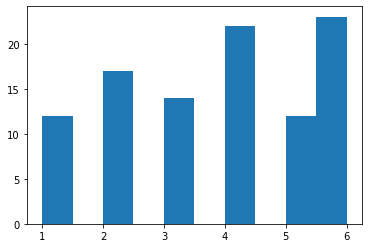

In [129]:
dice_hundred = dice_hundred.sort_values(by='value', ascending=False)
plt.hist(dice_hundred['value'])

In [ ]:
"""
I expected the value to be more even, but it looks like the number of rolls are not enough to make them even.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [130]:
# your code here
print(mean(dice_hundred['value']))

3.74


#### 3.- Now, calculate the frequency distribution.


In [137]:
# your code here
freq_dist1 = dice_hundred['value'].value_counts().reset_index() 
freq_dist1.columns = ['Number', 'Frequency']
freq_dist = freq_dist1.sort_values('Number')
print (freq_dist1)

   Number  Frequency
0       6         23
1       4         22
2       2         17
3       3         14
4       5         12
5       1         12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<BarContainer object of 6 artists>

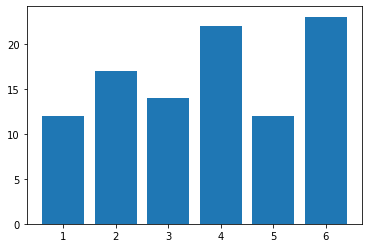

In [138]:
# your code here
plt.bar(freq_dist1['Number'],freq_dist1['Frequency'])

In [139]:
"""
your comments here
For a normal roll dice frequency, mean should be 3, but, as we can see on the graph, we got more times 4 and 6 than others, so,
its normal that our mean tends to go to the right (3.75)
"""

'\nyour comments here\nFor a normal roll dice frequency, mean should be 3, but, as we can see on the graph, we got more times 4 and 6 than others, so,\nits normal that our mean tends to go to the right (3.75)\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<BarContainer object of 6 artists>

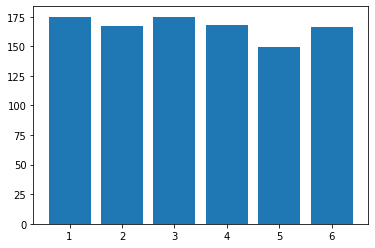

In [142]:
# your code here
dice_thousand = pd.read_csv('roll_the_dice_thousand.csv')
freq_dist2 = dice_thousand['value'].value_counts().reset_index() 
freq_dist2.columns = ['Number', 'Frequency']
freq_dist2 = freq_dist2.sort_values('Number')
plt.bar(freq_dist2['Number'],freq_dist2['Frequency'])

In [143]:
"""
As expected the results got normalized, and looks like we got similar values for the frequencies of each number from 1 to 6
"""

'\nAs expected the results got normalized, and looks like we got similar values for the frequencies of each number from 1 to 6\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
71.0            1
73.0            1
82.0            1
Length: 72, dtype: int64


(array([ 17.,  59., 115., 204., 261., 194.,  99.,  36.,  14.,   1.]),
 array([ 1. ,  9.1, 17.2, 25.3, 33.4, 41.5, 49.6, 57.7, 65.8, 73.9, 82. ]),
 <a list of 10 Patch objects>)

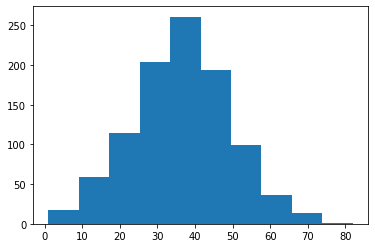

In [161]:
# your code here
ages = pd.read_csv('ages_population.csv')
ages_dist = ages.value_counts()
print(ages_dist)
plt.hist(ages['observation'])


In [163]:
'''
Gess mean is close to 35 and dont know how to guess estandar deviation through the eye... I guess I can take a value between the mean
and the max value (as it looks symmetric)(45 for example) and substrate the mean... so It could be 10.
'''

'\nGess mean is close to 35 and dont know how to guess estandar deviation through the eye... I guess I can take a value between the mean\nand the max value (as it looks symmetric)(45 for example) and substrate the mean... so It could be 10.\n'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [166]:
# your code here
print(ages['observation'].mean())
print(ages['observation'].std())

36.56
12.81649962597677


In [167]:
"""
Pretty close!
"""

'\nPretty close!\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64


(array([ 16.,  52., 119.,  98., 245., 254.,  90.,  92.,  29.,   5.]),
 array([19. , 20.7, 22.4, 24.1, 25.8, 27.5, 29.2, 30.9, 32.6, 34.3, 36. ]),
 <a list of 10 Patch objects>)

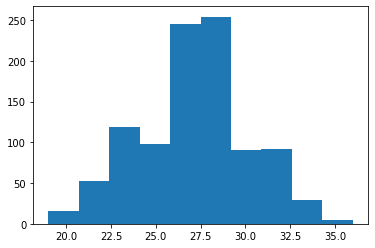

In [168]:
# your code here
ages2 = pd.read_csv('ages_population2.csv')
ages_dist2 = ages2.value_counts()
print(ages_dist2)
plt.hist(ages2['observation'])

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes, ages are more concentrated at the center.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [169]:
# your code here
print(ages2['observation'].mean())
print(ages2['observation'].std())

27.155
2.9698139326891835


In [170]:
"""
Mean is also close to the middle because is symmetrical, but, the std is lower as there are more ages close to the center (mean)
"""

'\nMean is also close to the middle because is symmetrical, but, the std is lower as there are more ages close to the center (mean)\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64


(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

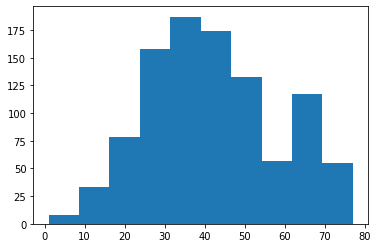

In [171]:
# your code here
ages3 = pd.read_csv('ages_population3.csv')
ages_dist3 = ages3.value_counts()
print(ages_dist3)
plt.hist(ages3['observation'])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [172]:
# your code here
print(ages3['observation'].mean())
print(ages3['observation'].std())

41.989
16.14470595986593


In [173]:
"""
There are more people into the right of the graph, thats why the mean is higher.
The std is also higher as it doesnt not look to be a concentration around the mean
"""

'\nThere are more people into the right of the graph, thats why the mean is higher.\nThe std is also higher as it doesnt not look to be a concentration around the mean\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [175]:
# your code here
Q1 = ages3['observation'].quantile(.25)
print(Q1)
Q2 = ages3['observation'].quantile(.5)
print(Q2)
Q3 = ages3['observation'].quantile(.75)
print(Q3)

30.0
40.0
53.0


In [ ]:
"""
Median and mean are pretty close values, that means that it has a normal shape distribution.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [184]:
# your code here
age_np = ages3['observation'].to_numpy()
age_np
np.percentile(age_np,[10,40,60,90])

array([22., 36., 45., 67.])

In [185]:
"""
Difference between 2 first percentiles are 14, and 12 for the other two. These means that there are more old people at our dataset
"""

'\nDifference between 2 first percentiles are 14, and 12 for the other two. These means that there are more old people at our dataset\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""